#  1-2 - Modeling Classification

# Marketing and Customer Analytics

**Outline**
1. Business Understanding
2. Modelling Workflow
3. Data Collection
4. Data Splitting
5. EDA
6. Modelling
7. Interpretation
8. Evaluation
9. Simulation

Ref: [Link](https://sciencepublishinggroup.com/journal/paperinfo?journalid=390&doi=10.11648/j.ijdst.20180401.15)


Load packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# <font color='Blue'>**1. Business Understanding**</font>
---
- Term deposit is always an essential business of a bank and a good market campaign plays an essential role in
financial selling.
- The commercial bank wants to implement
telemarketing campaign to optimize the allocation of resources,
satisfy the needs of customers thus enhancing the productivity
of companies

## **1.1 Business Objective**
- Increase 8% of term deposit
- Identify the relationship between predictors and target variable
## **1.2 Business Question**

- How can bank develop marketing effectiveness strategy to increase 8% of term deposit?
- What marketing initiatives are suitable to increase the 8% term of deposit?

## **1.3 Modelling Task**
- Output target: **client status term of deposite (categorical)**

- The goal of this project is to predict whether a client will deposit money or not based on various features.
Task: **Classification task**


- We need a model that can be easily interpreted so that we can understand how each feature contributes to the prediction. This can help us gain insights into the underlying factors that influence whether a client will deposit money or not.
Model used: **Logistic regression**

- Our target feature is balance, We will use accuracy as our evaluation metric since we want to maximize the number of correctly classified instances. **Evaluation metric: Accuracy**

# <font color='Blue'>**2. Modelling Workflow**</font>

## **Machine Learning Workflow** (Simplified)


### 1. <font color='blue'> Importing Data to Python</font>
    * Data validation
### 2. <font color='blue'> Exploratory Data Analysis:</font>
    * Descriptive Statistics, Univariate Analysis, Correlation Heatmap
### 3. <font color='blue'> Training Machine Learning:</font>
    * Model Fitting, Evaluation
### 4. <font color='blue'> Interpretation & Business Recommendation :</font>
    * Logistic Regression Coefficient, Recommendation
### 5. <font color='blue'> Business Simulation :</font>
    * Simulation

    # <font color='Blue'>**3. Data Pipelines**</font>
Outline:
- Data Description
- Data Collection

## **3.1 Data Description**

`Bank client data (Input variables)`
- `Age`: client’s age (numeric: from 18 to 88)
- `default`: credit default (nominal: no, yes)
- `housing`: housing loan (nominal: no, yes)
- `loan`: personal loan (nominal: no, yes)
- `duration`: last contact duration in seconds (numeric: from 0 to 3643)
- `campaign`: number of contacts performed during this campaign and for this client (numeric: from 1 to 35)
- `previous`: number of contacts performed before this campaign and for this client (numeric: from 0 to 6)

<br>

`Target Feature`
- `deposit`: succeed to subscribe the term deposit (binary: yes or no)
## **3.2 Data Collection**




In [2]:
def read_data(path):
    """
    Reads a CSV file at the given path, removes any duplicate rows, and returns its contents as a pandas DataFrame.

    Parameter
    ----------

    data: <str>
          sample data input path (csv format)

    Return
    ------

    df: <pandas dataframe>
        sampel data

    """

    df = pd.read_csv(path, index_col=0)

    df = df.drop_duplicates()

    return df

In [4]:
path = 'bank_telemarketing.csv'
df = read_data(path)

In [5]:
df.head()

,age,default,housing,loan,duration,campaign,previous,deposit
0,59,no,yes,no,1042,1,0,1
1,56,no,no,no,1467,1,0,1
2,41,no,yes,no,1389,1,0,1
3,55,no,yes,no,579,1,0,1
4,54,no,no,no,673,2,0,1


In [6]:
df.isna().sum()

,0
age,0
default,0
housing,0
loan,0
duration,0
campaign,0
previous,0
deposit,0


In [7]:
print(f'Number of duplicated data :  {df.duplicated().sum()}')

Number of duplicated data :  0


In [8]:
df.dtypes

,0
age,int64
default,object
housing,object
loan,object
duration,int64
campaign,int64
previous,int64
deposit,int64


# <font color='Blue'>**4. Data Splitting**</font>
- Using the function, Split the data into input and output data
- For simplicity, we will split the data into two parts: Training and Testing
- We split the train and test by ratio 0.7 : 0.3


In [9]:
def split_input_output(data, target_column):
    """
    Function to split input (x) and output (y)

    Parameters
    ----------
    data: <pandas dataframe>
          dataframe input

    target_column: <string>
                   output column name

    Return
    ------

    x: <pandas dataframe>
        input data

    y: <pandas dataframe>
       output data

    """
    X = data.drop(columns = target_column)
    y = data[target_column]

    return X, y

In [10]:
X, y = split_input_output(data = df,
                          target_column = "deposit")

In [11]:
n_samples, n_features = X.shape

print(f'Number of samples  :    {n_samples}')
print(f'Number of features :    {n_features}')

Number of samples  :    11058
Number of features :    7


In [13]:
# Import train test split
from sklearn.model_selection import train_test_split



# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 100,
                                                    stratify = y)

# <font color='Blue'>**5. Exploratory Data Analysis**</font>
---

In [14]:
eda_df = pd.concat([X_train, y_train], axis=1)

In [15]:
eda_df.head()

,age,default,housing,loan,duration,campaign,previous,deposit
793,34,no,no,no,518,2,0,1
8669,56,no,no,no,133,2,0,0
2329,28,no,no,no,136,2,0,1
7394,42,no,no,no,323,3,0,0
6064,60,no,no,yes,61,5,0,0


In [16]:
num = eda_df.select_dtypes(include='number').columns
cat = eda_df.select_dtypes(include='object').columns

In [17]:
print(f'Numerical features : \n{list(num)}')
print('\n')
print(f'Categorical features : \n{cat}')

Numerical features : 
['age', 'duration', 'campaign', 'previous', 'deposit']


Categorical features : 
Index(['default', 'housing', 'loan'], dtype='object')


## **5.1 Descriptive Analysis**

In [18]:
eda_df.describe()

,age,duration,campaign,previous,deposit
count,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000
mean,41.315891,369.925969,2.508786,0.840698,0.476227
std,11.928810,342.037163,2.700648,2.281874,0.499467
min,18.000000,2.000000,1.000000,0.000000,0.000000
25%,32.000000,138.000000,1.000000,0.000000,0.000000
50%,39.000000,256.000000,2.000000,0.000000,0.000000
75%,49.000000,492.000000,3.000000,1.000000,1.000000
max,92.000000,3881.000000,63.000000,58.000000,1.000000


## **5.2 Univariate Analysis**

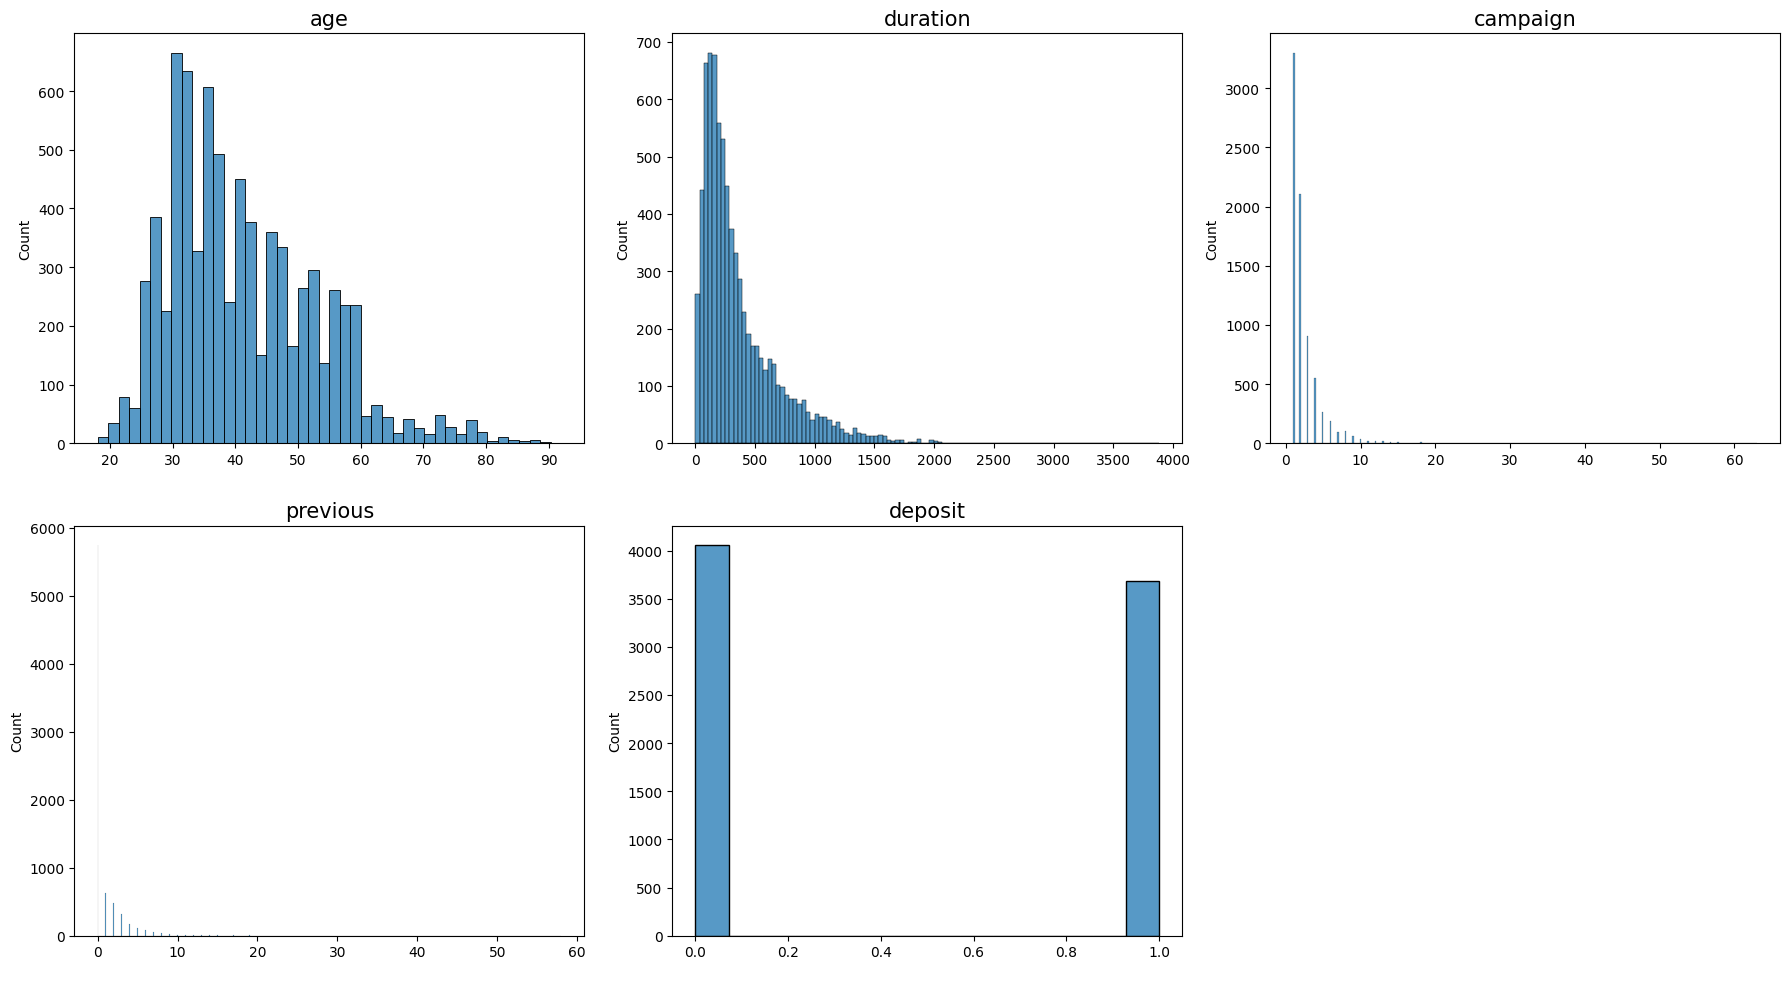

In [19]:
plt.figure(figsize=(18,10))
for i in range(0, len(num)):
    plt.subplot(2,3,i+1)
    sns.histplot(x=eda_df[num[i]])
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

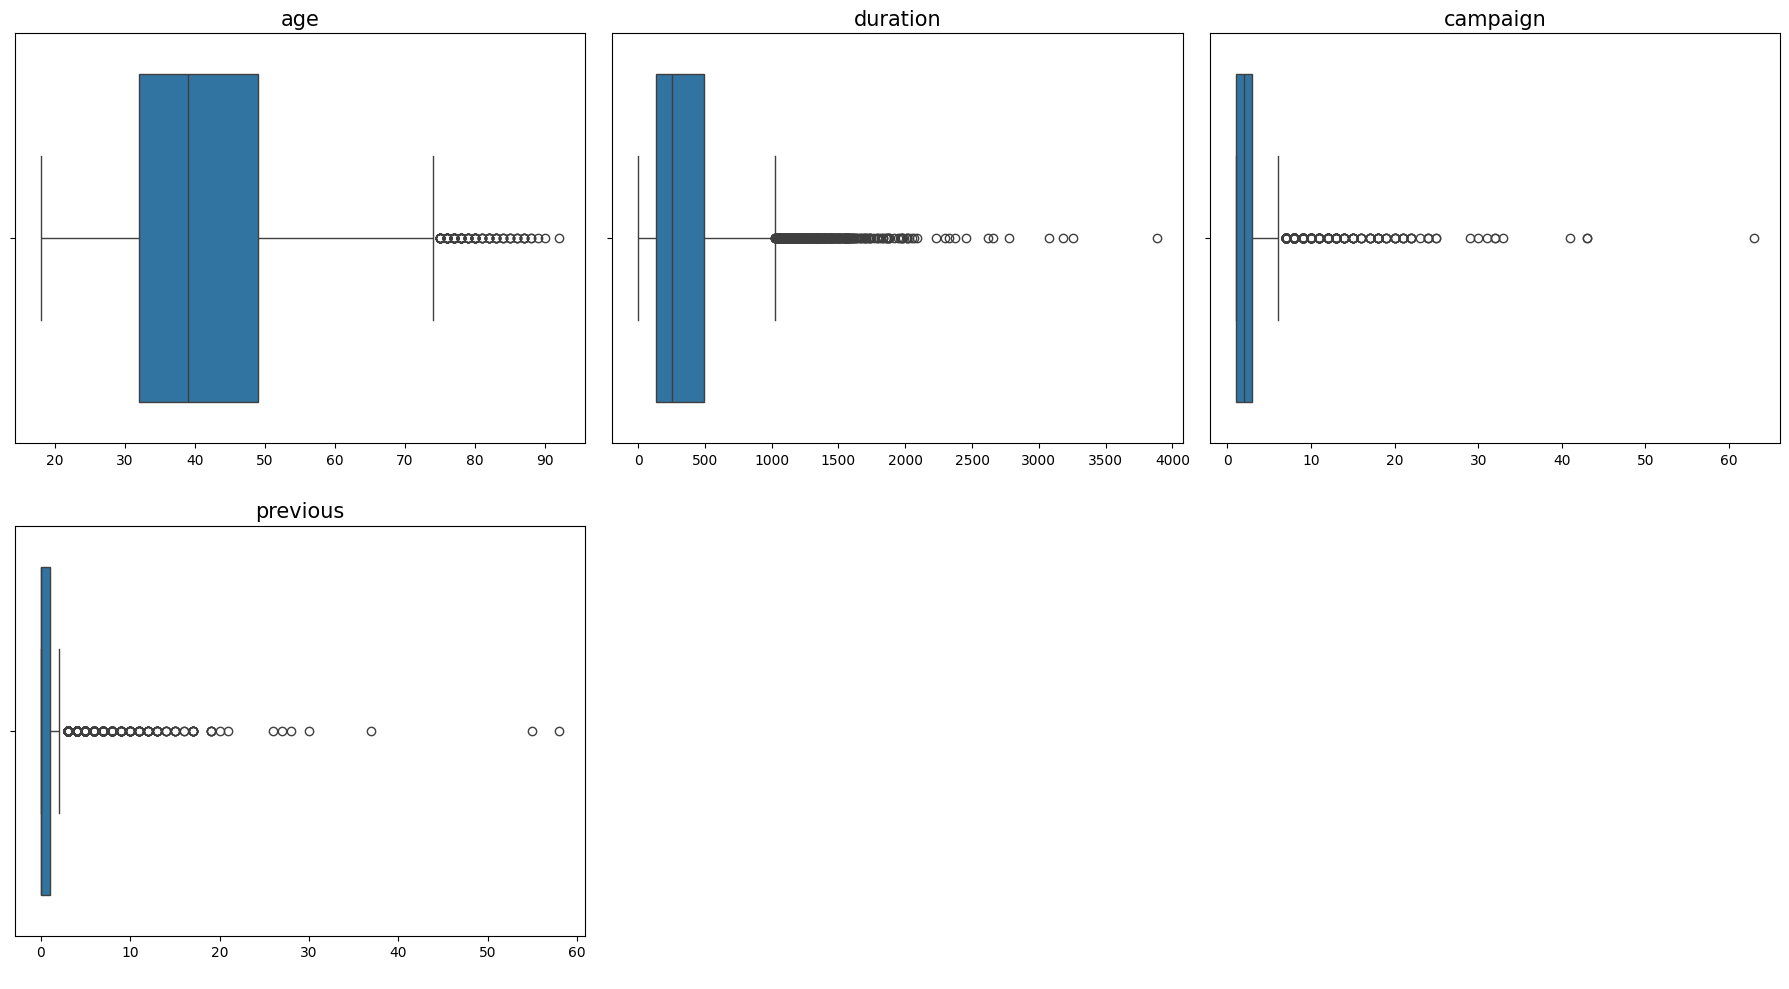

In [20]:
plt.figure(figsize=(18,10))
for i in range(0, len(num)-1):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=eda_df[num[i]])
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

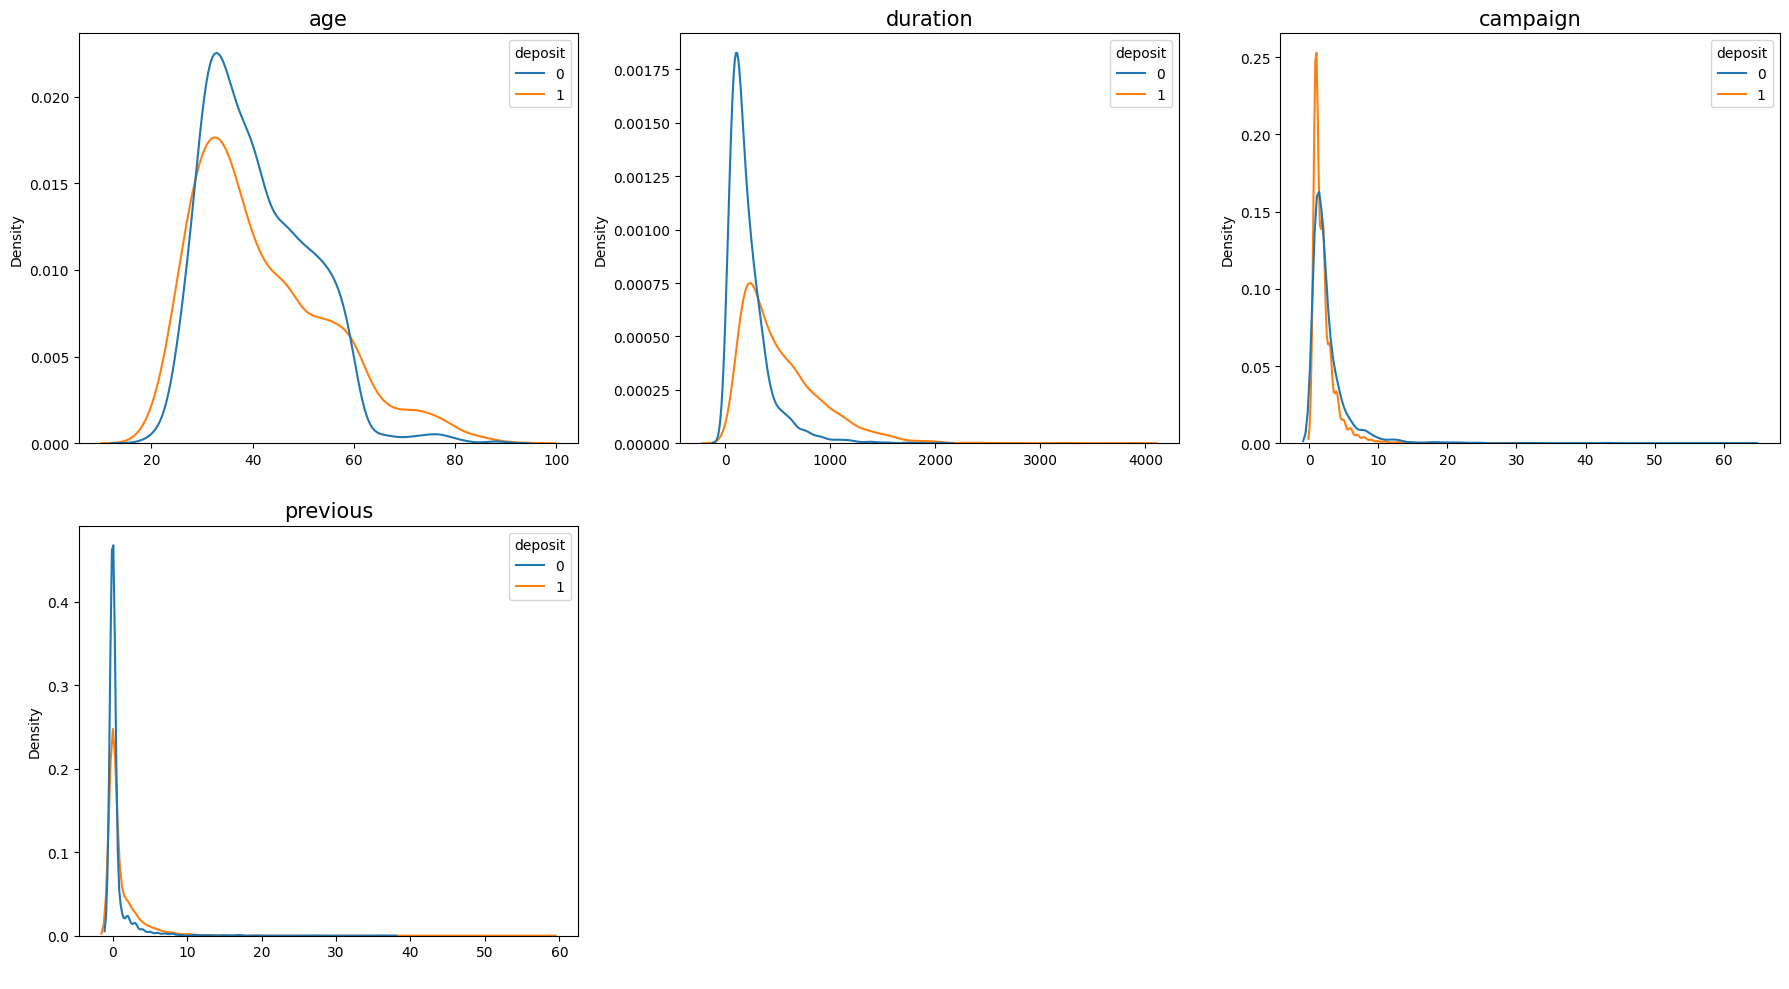

In [21]:
plt.figure(figsize=(18,10))
for i in range(0, len(num)-1):
    plt.subplot(2,3,i+1)
    sns.kdeplot(x=eda_df[num[i]], hue=eda_df['deposit'])
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

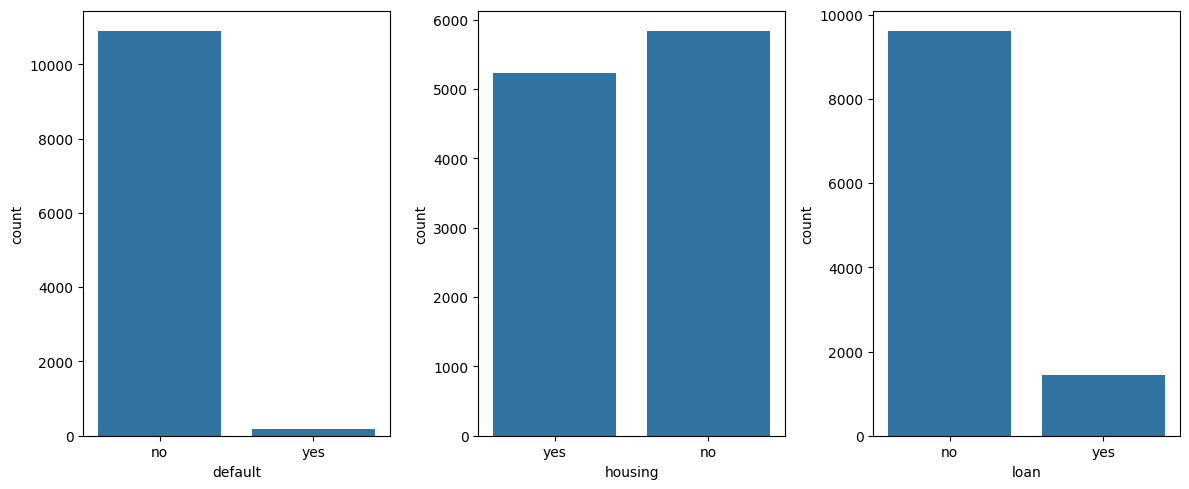

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

for i, col in enumerate(cat):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_xlabel(col)

plt.tight_layout()

# <font color='Blue'>**6. Data Preprocessing**</font>
---
- We will only encode the categorical features in pre processing

In [23]:
train_set = pd.concat([X_train, y_train], axis=1)

## **6.1 Categorical Encoding**

In [24]:
from sklearn.preprocessing import OneHotEncoder

def encoding_cat_feature(data, fit=False, encoder=None):
    """Encode categorical features using one-hot encoding and return the resulting DataFrame.

    Parameters:
    -----------
    data : <pandas.DataFrame>
           The DataFrame containing the data to be encoded.

    fit : <bool, default=False>
          If True, fit a new OneHotEncoder to the data. If False, use an existing encoder.

    encoder : <OneHotEncoder, default=None>
              The OneHotEncoder object to use for encoding. This parameter is ignored if fit=True.

    Returns:
    --------
    encoder : <OneHotEncoder>
              The OneHotEncoder object used to transform the data.

    final_df : <pandas DataFrame>
               The DataFrame containing the encoded features and the target variable.
    """

    data_copy = data.copy().reset_index(drop=True)
    target_col = data_copy['deposit']
    data_copy = data_copy.drop('deposit', axis=1)

    cat_features = data_copy.select_dtypes(include='object').columns

    if fit:
        ohe = OneHotEncoder(handle_unknown='ignore', drop='first')


        ohe.fit(data_copy[cat_features])
        encoder = ohe
        encoded_df = pd.DataFrame(ohe.transform(data_copy[cat_features]).toarray())
    else:
        encoded_df = pd.DataFrame(encoder.transform(data_copy[cat_features]).toarray())

    encoded_df.columns = encoder.get_feature_names_out(cat_features)

    dropped_data = data_copy.drop(cat_features, axis=1)
    final_df = dropped_data.join([encoded_df, target_col])

    return encoder, final_df

In [25]:
encoder, train_set = encoding_cat_feature(data = train_set,
                                          fit = True)

In [26]:
train_set.head()

,age,duration,campaign,previous,default_yes,housing_yes,loan_yes,deposit
0,34,518,2,0,0.0,0.0,0.0,1
1,56,133,2,0,0.0,0.0,0.0,0
2,28,136,2,0,0.0,0.0,0.0,1
3,42,323,3,0,0.0,0.0,0.0,0
4,60,61,5,0,0.0,0.0,1.0,0


In [27]:
X_train, y_train = split_input_output(data = train_set,
                                      target_column = "deposit")

# <font color='Blue'>**7. Modelling**</font>
---
**Sigmoid Function**
- The sigmoid function is often used in logistic regression because it allows us to map the output of a linear model (which can take on any value) to a probability (which must be between 0 and 1).
<br>
$$
\begin{align*}
p(x) &= \frac{e^{(\beta_{0}+\beta_{1}x)}}{1+e^{(\beta_{0} +\beta_{1}x)}} \\
&= \frac{e^{\text{log(odds)}}}{1+e^{\text{log(odds)}}} \\
\end{align*}
$$
<br>
- When we use logistic regression for classification, we use a threshold value (usually 0.5) to decide whether a given input belongs to the positive class or the negative class.

<br>

**Likelihood Function**

<br>

In general, **likelihood function** for the identical and independent observations with binary response:

$$
\mathcal{L} = \prod_{i=1}^{n}p(x_{i})^{y_{i}}[1-p(x_{i})]^{(1-y_{i})}
$$

<br>

**Maximum Likelihood Estimation**

<br>

- We want the maximum likelihood estimate $p(x)$ from the n observations, where:
$$
p(x) = \frac{e^{(\beta_{0}+\beta_{1}x)}}{1+e^{(\beta_{0}+\beta_{1}x)}}
$$

<br>

- To maximize the likelihood function $\mathcal{L}$, we need to find the optimum parameter $\beta_{0}$ and $\beta_{1}$.

<br>

**Negative Log Likelihood (NLL)**

<br>


- To make it easier to compute, we transform the likelihood function into **log likelihood function**:

<br>

$$
\log(\mathcal{L}(\beta)) = \sum_{i=1}^{n}(y_{i}\log[p(x_{i})]+(1-y_{i})\log[1-p(x_{i})])
$$
<br>
- Our objective is to maximise this function by finding the optimal value of $\beta_{0}$ and $\beta_{1}$

- We want to maximize the log likelihood, but gradient descent optimization works to minimize the cost function.
- Thus, we take the negative value of log likelihood as the cost function.
- So if larger negative value we get basically is the same as we maximise the likelihood function --> Our goal is to minimize the negative log likelihood (NLL) function
- The **negative log likelihood (NLL)** or **log loss** is defined as:
<br>
$$
-\log(\mathcal{L}(\beta)) = -\sum_{i=1}^{n}(y_{i}\log[p(x_{i})]+(1-y_{i})\log[1-p(x_{i})])
$$

<br>

**Gradient Descent**
- Since we want to **Minimize** the cost function negative log likelihood, we can se by this following notation:
<br>

$$
\underset{\beta}{\arg \min} \ \text{NLL}(\beta)
$$

- In order to implement gradient descent, we have to take partial derivative of log-likelihood with respect to each parameter
- The derivative of log loss or negative log-likelihood (NLL) w.r.t. $\beta_{j}$ is called the gradient of $\beta_{j}$.
<br>
<br>
$$
\frac{\partial \text N \text L \text L}{\partial \beta_{j}}=-\sum_{i=1}^{n}\left [ y_{i}-p(x_{i}) \right ]x_{j}
$$ <br>
- Then we keep updating parameter $\beta$ until converge on the best value of $\beta$ (Or until several n_interation) <br>
<br>
$$
\beta_{j}^{new} := \beta_{j}^{old} - \alpha \frac{\partial \text N \text L \text L}{\partial \beta_{j}^{old}}
$$ <br>
- Where $\alpha$ is the learning rate and $:=$ operation overwrite the $\beta_{old}$ with $\beta_{new}$

**Decision Boundary**
- After finding the optimal value of $\beta_{0}$ and $\beta_{1}$, we can set the parameter to the sigmoid function
<br>

$$
p(x) = \frac{e^{(\beta_{0}+\beta_{1}x)}}{1+e^{(\beta_{0}+\beta_{1}x)}}
$$
<br>
- Then we can predict the input x with output as probability with the decision boundary: <br> <br>
\begin{equation}
\text{decision}(x) = \begin{cases}
1 & \text{if } p(y=1|x) > 0.5 \\
0 & \text{otherwise}.
\end{cases}
\end{equation}

Ref: [Lecture Note](https://cs229.stanford.edu/notes2021fall/cs229-notes1.pdf)

## **7.1 Baseline Model**

- The baseline model is a simple and straightforward model used as a point of reference for comparing the performance of other models.

- By comparing the performance of more advanced models to the baseline model, we can assess whether the other models provide any significant improvement.

- The baseline model helps establish a benchmark to evaluate the performance of more complex models.

- If a more sophisticated model performs worse than the baseline model, it indicates that the advanced model is not effective and needs improvement.


In [28]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train)

baseline_score = dummy_clf.score(X_test, y_test)

print(f"Accuracy of baseline model : {baseline_score:.2f}")

Accuracy of baseline model : 0.52


## **7.2 Logistic Regression Model**

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty= None, random_state=32)

In [44]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None, random_state=32)

In [45]:
from sklearn.metrics import accuracy_score, classification_report

y_train_pred = lr.predict(X_train)

print('TRAINING RESULT:')
print(f'Accuracy Score Model in Training Data : {accuracy_score(y_train, y_train_pred):.2f}')
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred))
print('======================================================')

TRAINING RESULT:
Accuracy Score Model in Training Data : 0.77
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      4054
           1       0.78      0.73      0.75      3686

    accuracy                           0.77      7740
   macro avg       0.77      0.77      0.77      7740
weighted avg       0.77      0.77      0.77      7740



In [46]:
print(f'Accuracy in Baseline model using training data : {baseline_score:.2f} %')
print(f'Accuracy in Logistic Regression model using training data : {accuracy_score(y_train, y_train_pred):.2f} %')

Accuracy in Baseline model using training data : 0.52 %
Accuracy in Logistic Regression model using training data : 0.77 %


# <font color='Blue'>**8. Evaluation**</font>
---
## **8.1 Preprocessing Test Set**



In [47]:
test_set = pd.concat([X_test, y_test], axis=1)

In [48]:
_, test_set = encoding_cat_feature(data = train_set,
                                   fit = encoder)

In [49]:
X_test, y_test = split_input_output(data = test_set,
                                    target_column = "deposit")

## **8.2 Evaluation**

In [50]:
y_test_pred = lr.predict(X_test)

print('\nVALIDATION RESULT:')
print(f'Accuracy Score Model in Testing Data : {accuracy_score(y_test, y_test_pred):.2f}')
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')


VALIDATION RESULT:
Accuracy Score Model in Testing Data : 0.77
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      4054
           1       0.78      0.73      0.75      3686

    accuracy                           0.77      7740
   macro avg       0.77      0.77      0.77      7740
weighted avg       0.77      0.77      0.77      7740



In [51]:
print(f'Accuracy in Baseline model using testing data : {baseline_score:.2f} %')
print(f'Accuracy in Logistic Regression model using testing data : {accuracy_score(y_test, y_test_pred):.2f} %')

Accuracy in Baseline model using testing data : 0.52 %
Accuracy in Logistic Regression model using testing data : 0.77 %


# **<font color='Blue'>9. Interpretation</font>**
---

- To interpret in terms of odds, we transform the log(odds) into odds.

$$
 \text {log(odds)} = \beta_{0}+\beta_{1}x
$$
  - Thus,
$$
\begin{align*}
\text {odds} &= e^{(\beta_{0}+\beta_{1}x)} \\
&= e^{\beta_{0}} \left (e^{\beta_{1}} \right )^{x} \\
\end{align*}
$$
<br>
  - Interpretation: **the estimated odds of success multiply by $\text{exp}(\beta_{1})$ for one unit increase in $x$.**

In [52]:
def get_coeff(clf, feature_name):

    """
    Parameters
    ----------
    clf : <model sklearn>
          fitted model sklearn

    feature_name: <list>
                  list of feature name

    Return
    ------

    df: <pandas DataFrame>
        Dataframe of coefficient name and coefficient value
    """

    feature_importance = (pd.DataFrame({'variable': feature_name,
                                        'coefficient': clf.coef_[0]
                                        }).round(decimals=6).sort_values('coefficient', ascending=False))

    intercept = pd.DataFrame({'variable': 'intercept', 'coefficient': clf.intercept_[0]}, index=[len(feature_importance)])

    df = pd.concat([feature_importance, intercept])

    return df

In [53]:

coef = get_coeff(clf = lr,
                 feature_name = X_train.columns)

coef

,variable,coefficient
3,previous,0.214292
1,duration,0.004868
0,age,-0.004630
4,default_yes,-0.098924
2,campaign,-0.167486
6,loan_yes,-0.862580
5,housing_yes,-1.234949
7,intercept,-0.661431


In [54]:
coef2 = coef.copy()
coef2['exp'] = np.exp(coef2['coefficient'])
coef2

,variable,coefficient,exp
3,previous,0.214292,1.238984
1,duration,0.004868,1.004880
0,age,-0.004630,0.995381
4,default_yes,-0.098924,0.905812
2,campaign,-0.167486,0.845788
6,loan_yes,-0.862580,0.422072
5,housing_yes,-1.234949,0.290850
7,intercept,-0.661431,0.516112


- `previous`:
  - For every 1 point increase in previous, the odds of customer will deposit increase by a factor of exp(0.214295), or approximately 1.238988.

  - if the bank increases the number of people will be contacted, increase the client deposit odds by about 20%. (odds = 1.2)

  - Marketing innitiative: Bank can increase number of poeple contacted so the odds of client will subscribe term of deposite increased <br>
<br>
- `duration`:
  - For every 1 second increase in duration, the odds of customer will deposit increase by a factor of exp(0.004979), or approximately 1.004880

  - adding 1 minute (60 seconds) contact duration increases client deposit odds by around 33% (odds = 1.33, exp(0.004979*60))

  - Marketing innitiative: The bank can increases the call duraiton (telemarketing) so the odds of the bank clients will subscribe term of deposit increased<br>
<br>
- `age`:
  - For every 1 point increase in estimated age, the odds of customer will deposit decrease by a factor of exp(-0.004630), or approximately 0.99. The odds will decrease about 1% every 1 year increasing in estimated age.

  - Since, the odds of client will deposit is < 1, It simply means that the probability of depositing is less than 0.5 for older clients, younger clients tend to have higher probability of customer will subscribe term of deposit than old clients

  - Marketing innitiative: create marketing campaign with goal to attract younger pontential clients <br>
  
<br>

- `default_yes`:
  - The estimated odds for customer deposit is decrease by a factor of exp(-0.098920), or approximately 0.905815 given the default is yes. The odds will decrease 10% given the client is default
  - The probability of bank clients will deposit is less than 0.5 given the customer default is yes
  - It means, the probability of clients will deposit given the client is not default will be higher than the default client<br>
  - Marketing innitiative: Profilling and targeting the clients who have no default record and give specific marketing treatment to them
<br>

- `campaign`:
  - For every 1 point increase in campaign, the odds of customer will deposit decrease by a factor of exp(-0.167484), or approximately 0.845790. The odds will decrease 15% every increasing number of contact during campaign

  - Since the odds of client will deposit < 1, It simply means that the probability of depositing is less than 0.5 for contacting the potential client during the campaign.

  - So, the probability of client will subscribe term of deposit for less contact during the campaign will be hgiher

  - Marketing innitiative: Try to decrease the number of contact during the campaign <br>
<br>
- `loan_yes`:
  - The estimated odds for customer deposit is decrease by a factor of exp(-0.862596), or approximately 0.422065 given the loan is yes. The odds will decrease 58% given the clients have loan.
  - Since the probability of client will deposit < 0.5 given the clients have loan, it means the probability of clients who have no loan will be higher than those who have loan
  - Marketing innitiative: Give specific marketing treatment for the clients who have no loan record <br>
<br>
- `housing_yes`:
  - The estimated odds for customer deposit is decrease by a factor of exp(-1.234939), or approximately 0.290853 given the loan housing is yes. The odds will decrease 71% given the clients have housing loan

  - It means the probability of clients will subscribe term of deposit given they have loan housing is less < 0.5, so the probability of clients will subscribe given the they have no loan housing tend to be higher

  - Marketing innitiative: Give specific marketing treatment for the clients who have no housing loann <br>
<br>
- `Intercept` :
  - estimated odds of a customer will subscribe term of deposit when all variable equal to 0 is 0.516116.
  - When all variable 0 means when the number of contacted is 0, call duration is 0 minute, age = 0 (we need to center / transform the variable to interprete this), when the there's no exposure of the campaign, when the customer is not default, when the clients don't have loan, when the clients don't have housing loan
  - So the probability of customer will buy the term of deposit is < 0.5 when all variabes are equal to 0

# <font color='Blue'>10. Simulation</font>
---

In [55]:
print(f'Existing Deposit Rate : {y.mean()*100:.2f} %')

print(f"Target Deposit Rate Increase : {(y.mean()*100+8):.2f} %")

Existing Deposit Rate : 47.62 %
Target Deposit Rate Increase : 55.62 %


In [56]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_test_pred)
cf_matrix

array([[3309,  745],
       [1011, 2675]])

In [57]:
def simulation(df, simulation_features, lr, cf_matrix, feature):
    """
    Simulates the effect of increasing a feature on the model's deposit rate (DR).

    Parameters
    ----------
    df: <pandas DataFrame>
        containing the data

    simulation_features : <list>
                          all feature used in the simulation

    lr: <sklearn model object>
        fitted model

    cf_matrix: <confusion matrix>

    feature: the name of the feature to simulate

    Returns
    -------
    None
    """
    tp, fn, fp, tn = cf_matrix.flatten()

    df_deposit = df[df.deposit == 1][simulation_features]
    df_not_deposit = df[df.deposit == 0][simulation_features]

    dr_list = []

    experiments = np.arange(-1,1.05,0.05)
    experiments[20] = 0
    for i in experiments:
        df_simulation = df.copy()
        df_simulation[feature] = df_simulation[feature]*(1+i)

        simulation_pred = lr.predict(df_simulation.drop('deposit', axis=1))


        simulation_pred_pos = simulation_pred[simulation_pred==0] # find all predicted as negative (0)
        simulation_pred_pos[:(int(np.ceil((fp/(fp+tp))*(simulation_pred[simulation_pred==0].size))))] = 1 # change fp rate to predicted as positive (but false)
        simulation_pred_neg = simulation_pred[simulation_pred==1] # find all predicted as positive
        simulation_pred_neg[:(int(np.ceil((fn/(fn+tn))*(simulation_pred[simulation_pred==1].size))))] = 0 # change fn rate to predicted as negative (but false)
        simulation_pred = np.concatenate((simulation_pred_neg, simulation_pred_pos))

        # Calculate Simulation Deposit Rate (DR)
        dr = simulation_pred[simulation_pred==1].size/simulation_pred.size
        dr_list.append(dr)

    # Create DR Plot
    print(dr_list)
    plt.plot(experiments, dr_list, marker='o', linewidth=1)
    plt.ylabel('Deposit Rate')
    plt.xlabel(str(feature) + ' Increased')
    plt.title('Deposit Rate Increased by ' + str(feature))
    plt.axvline(linewidth=1, color='r', label = 'Current Condition')
    plt.legend()
    plt.show()

In [58]:
# Define name/path of the dataset for simulation
path = 'bank_telemarketing.csv'

# Read dataset for simulation
df_sim = read_data(path)

# Encode categorical data
_, df_sim = encoding_cat_feature(data = df_sim,
                                 fit = encoder)

In [59]:
# Shanity check
df_sim.head()

,age,duration,campaign,previous,default_yes,housing_yes,loan_yes,deposit
0,59,1042,1,0,0.0,1.0,0.0,1
1,56,1467,1,0,0.0,0.0,0.0,1
2,41,1389,1,0,0.0,1.0,0.0,1
3,55,579,1,0,0.0,1.0,0.0,1
4,54,673,2,0,0.0,0.0,0.0,1


[0.2466087900162778, 0.24823657080846445, 0.25094953879544224, 0.25583288117200215, 0.2634291915355399, 0.27509495387954425, 0.2875746066196419, 0.3015916078856936, 0.3160607704829083, 0.33242901067100744, 0.3481642249954784, 0.36380900705371677, 0.37936335684572253, 0.39446554530656536, 0.40938686923494305, 0.42313257370229695, 0.4360643877735576, 0.4478205823837945, 0.45885331886417074, 0.46970519081208173, 0.47947187556520166, 0.48860553445469346, 0.4966540061493941, 0.5034364261168385, 0.5110327364803762, 0.5195333695062399, 0.5262253572074517, 0.5333695062398264, 0.5400614939410382, 0.5462108880448544, 0.5512750949538795, 0.5571531922589981, 0.5633025863628143, 0.5690902514017001, 0.5735214324470971, 0.5790378006872853, 0.5826550913365889, 0.5875384337131488, 0.5914270211611503, 0.5960390667390125, 0.5998372219207814]


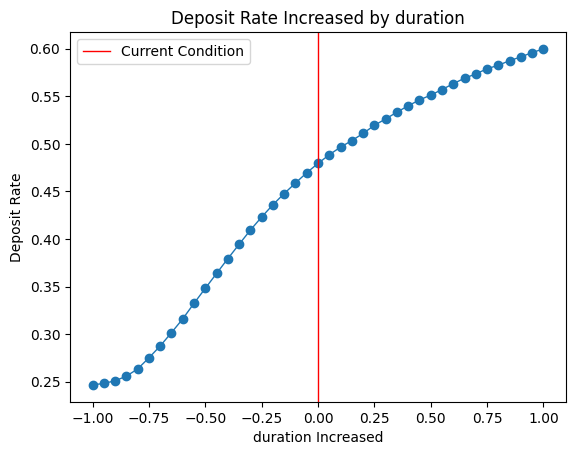

In [60]:
# Simulation
simulation(df = df_sim,
           simulation_features = df_sim.columns,
           lr = lr,
           cf_matrix = cf_matrix,
           feature = 'duration')

1. `How can bank develop marketing effectiveness strategy to increase 8% of term deposit?`
- One of the possible way to increase 8% of number of deposit is to **increase call duration up to 50%**
- From the simulation above, we can reach 55% of deposite rate by increasing call duration for about 50%
2. `What variables are important to increase marketing effectiveness?`
- One of important variable is **call duration**
- We can maximize call duration by giving the telemarketer proper marketing technique to make the clients aggree to subscribe deposit term